In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2347/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1464, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-11-20,1549.099976,1550.900024,1526.699951,1530.000000,18171724
2025-11-21,1546.599976,1557.800049,1540.099976,1541.000000,9615271
2025-11-24,1535.900024,1550.000000,1531.800049,1550.000000,18433951
2025-11-25,1539.699951,1559.599976,1525.099976,1535.900024,15033482
2025-11-26,1569.900024,1571.599976,1540.500000,1542.300049,14054299


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 4774


,date,title,source
0,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."
1,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
2,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
3,"Fri, 17 Jan 2020 08:00:00 GMT",Reliance Industries posts record Q3 profit at ...,"{'href': 'https://www.businesstoday.in', 'titl..."
4,"Tue, 07 Jan 2020 08:00:00 GMT",Reliance refers to start-up playbook to grow J...,"{'href': 'https://www.business-standard.com', ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done
Solving environment: \ 

| 

done




==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-25.11.0              |  py313h78bf25f_0         1.2 MB  conda-forge
    joblib-1.5.2               |     pyhd8ed1ab_0         219 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    regex-2025.11.3            |  py313h07c4f96_1         402 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-



nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 



joblib-1.5.2         | 219 KB    | ##6                                   |   7% 

nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 


regex-2025.11.3      | 402 KB    | #4                                    |   4% 
conda-25.11.0        | 1.2 MB    | 4                                     |   1% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | 1                                     |   1% 


regex-2025.11.3      | 402 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 


conda-25.11.0        | 1.2 MB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 




regex-2025.11.3      | 402 KB    | ##################################### | 100% 


openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 






certifi-2025.11.12   | 153 KB    | ##################################### | 100% 




certifi-2025.11.12   | 153 KB    | ##################################### | 100% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 





joblib-1.5.2         | 219 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 





ca-certificates-2025 | 149 KB    | ##################################### | 100% 



nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 

openssl-3.6.0        | 3.0 MB    | ##################################### | 100% 


conda-25.11.0        | 1.2 MB    | ##################################### | 100% 

                                                                                

                                                                                


                                                                                



                                                                                




                                                                                






Preparing transaction: - 

done
Verifying transaction: | 

/ 

done
Executing transaction: \ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...
1,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
2,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
3,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...
4,Reliance refers to start-up playbook to grow J...,reliance refers startup playbook grow jio inte...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-11-27 02:48:02.638297: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11/27/2025 02:48:05 AM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


11/27/2025 02:48:06 AM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.



Starting sentiment analysis with FinBERT. This will take a very long time...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

  Processed 64/4774 headlines...


  Processed 128/4774 headlines...


  Processed 192/4774 headlines...


  Processed 256/4774 headlines...


  Processed 320/4774 headlines...


  Processed 384/4774 headlines...


  Processed 448/4774 headlines...


  Processed 512/4774 headlines...


  Processed 576/4774 headlines...


  Processed 640/4774 headlines...


  Processed 704/4774 headlines...


  Processed 768/4774 headlines...


  Processed 832/4774 headlines...


  Processed 896/4774 headlines...


  Processed 960/4774 headlines...


  Processed 1024/4774 headlines...


  Processed 1088/4774 headlines...


  Processed 1152/4774 headlines...


  Processed 1216/4774 headlines...


  Processed 1280/4774 headlines...


  Processed 1344/4774 headlines...


  Processed 1408/4774 headlines...


  Processed 1472/4774 headlines...


  Processed 1536/4774 headlines...


  Processed 1600/4774 headlines...


  Processed 1664/4774 headlines...


  Processed 1728/4774 headlines...


  Processed 1792/4774 headlines...


  Processed 1856/4774 headlines...


  Processed 1920/4774 headlines...


  Processed 1984/4774 headlines...


  Processed 2048/4774 headlines...


  Processed 2112/4774 headlines...


  Processed 2176/4774 headlines...


  Processed 2240/4774 headlines...


  Processed 2304/4774 headlines...


  Processed 2368/4774 headlines...


  Processed 2432/4774 headlines...


  Processed 2496/4774 headlines...


  Processed 2560/4774 headlines...


  Processed 2624/4774 headlines...


  Processed 2688/4774 headlines...


  Processed 2752/4774 headlines...


  Processed 2816/4774 headlines...


  Processed 2880/4774 headlines...


  Processed 2944/4774 headlines...


  Processed 3008/4774 headlines...


  Processed 3072/4774 headlines...


  Processed 3136/4774 headlines...


  Processed 3200/4774 headlines...


  Processed 3264/4774 headlines...


  Processed 3328/4774 headlines...


  Processed 3392/4774 headlines...


  Processed 3456/4774 headlines...


  Processed 3520/4774 headlines...


  Processed 3584/4774 headlines...


  Processed 3648/4774 headlines...


  Processed 3712/4774 headlines...


  Processed 3776/4774 headlines...


  Processed 3840/4774 headlines...


  Processed 3904/4774 headlines...


  Processed 3968/4774 headlines...


  Processed 4032/4774 headlines...


  Processed 4096/4774 headlines...


  Processed 4160/4774 headlines...


  Processed 4224/4774 headlines...


  Processed 4288/4774 headlines...


  Processed 4352/4774 headlines...


  Processed 4416/4774 headlines...


  Processed 4480/4774 headlines...


  Processed 4544/4774 headlines...


  Processed 4608/4774 headlines...


  Processed 4672/4774 headlines...


  Processed 4736/4774 headlines...


  Processed 4774/4774 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,mukesh ambanis reliance industry india answer ...,neutral
1,reliance industry starting roll new ecommerce ...,neutral
2,year reliance becomes india digital champion v...,neutral
3,reliance industry post record q profit r crore...,positive
4,reliance refers startup playbook grow jio inte...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2347/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2347/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501587,719.791212,682.839822,719.791212,32545850,685.892962,54.332537,0.4
2020-01-21,686.194946,691.540813,680.871417,683.823983,18922720,686.669442,54.600544,0.0
2020-01-22,685.948792,691.943331,684.942246,690.713115,10322817,686.607125,49.591920,0.0
2020-01-23,683.041138,689.796156,680.289905,687.358062,11247739,686.278006,47.885913,0.0
2020-01-24,680.670166,687.290983,679.328085,683.108201,14628445,686.918684,54.701076,0.0


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1446,2025-11-20,1549.099976,1550.900024,1526.699951,1530.000000,18171724,1502.478577,74.321179,0.0
1447,2025-11-21,1546.599976,1557.800049,1540.099976,1541.000000,9615271,1506.900007,73.862801,0.0
1448,2025-11-24,1535.900024,1550.000000,1531.800049,1550.000000,18433951,1511.385725,74.378938,0.0
1449,2025-11-25,1539.699951,1559.599976,1525.099976,1535.900024,15033482,1516.142866,75.113164,0.0
1450,2025-11-26,1569.900024,1571.599976,1540.500000,1542.300049,14054299,1521.414298,76.394904,0.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.7
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.5
2020-01-22,0.243342,0.072348,0.207570,0.466039,0.5
2020-01-23,0.240906,0.078830,0.207273,0.447050,0.5
2020-01-24,0.238920,0.102524,0.207850,0.522908,0.5


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1391, 60, 5)
Shape of y_data: (1391,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1112, 60, 5)
y_train shape: (1112,)
X_test shape: (279, 60, 5)
y_test shape: (279,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-11-27 02:50:15.895262: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.25/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 999.43 INR
R-squared (R²) Score: -102.20


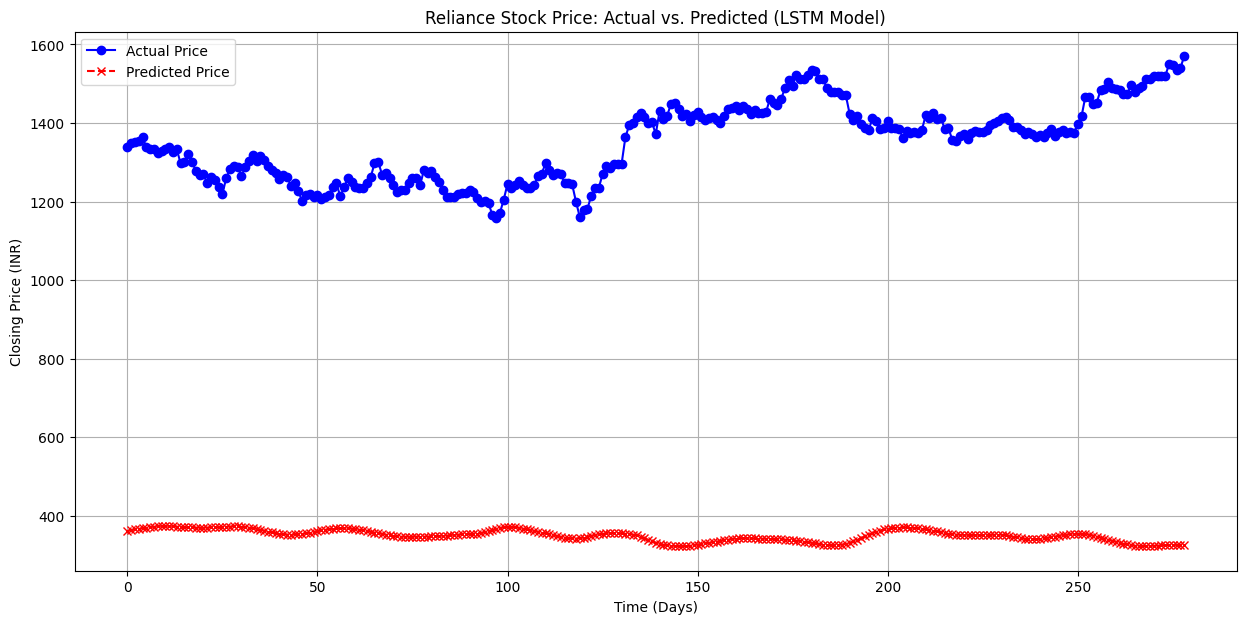

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - loss: 0.4660

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3484

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2785

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2484

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2167

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1934

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1754

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1612

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1497

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1399

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1316

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1244

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1181 - val_loss: 0.0016


Epoch 2/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0102

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0105

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0100

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0099

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0097

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0096

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0094

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0093

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0092

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0091

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0089

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0087 - val_loss: 0.0014


Epoch 3/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0067

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0059

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0056

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0054 - val_loss: 0.0015


Epoch 4/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0064

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0052

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0051

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0051 - val_loss: 0.0013


Epoch 5/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0026

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0043

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - val_loss: 0.0011


Epoch 6/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0042 - val_loss: 0.0011


Epoch 7/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0032

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0038 - val_loss: 0.0019


Epoch 8/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0042

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0043 - val_loss: 0.0013


Epoch 9/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0061

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0045

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0043

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0040 - val_loss: 0.0014


Epoch 10/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0042

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0042

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0039

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0038 - val_loss: 0.0012


Epoch 11/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0038 - val_loss: 0.0012


Epoch 12/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0032

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0033 - val_loss: 0.0010


Epoch 13/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0035 - val_loss: 0.0016


Epoch 14/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0050

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0037 - val_loss: 0.0012


Epoch 15/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0039

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0037

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0037

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0035 - val_loss: 8.9186e-04


Epoch 16/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0034

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 0.0011


Epoch 17/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0034

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0035

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0033 - val_loss: 0.0010


Epoch 18/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0032

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0036 - val_loss: 8.7250e-04


Epoch 19/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0035

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 8.0911e-04


Epoch 20/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 8.7321e-04


Epoch 21/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0021

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 9.4215e-04


Epoch 22/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0026

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 7.4266e-04


Epoch 23/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0032

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 0.0015


Epoch 24/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0036

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 9.7525e-04


Epoch 25/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 7.6136e-04


Epoch 26/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0023

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 0.0012


Epoch 27/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0020

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 0.0012


Epoch 28/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0038

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 8.2311e-04


Epoch 29/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0036

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0034

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 7.0736e-04


Epoch 30/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0020

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 6.7885e-04


Epoch 31/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0024

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 8.1592e-04


Epoch 32/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0024

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 6.6561e-04


Epoch 33/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0028

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027 - val_loss: 0.0010


Epoch 34/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0028

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0028 - val_loss: 6.3605e-04


Epoch 35/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0022

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 7.2055e-04


Epoch 36/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 0.0012


Epoch 37/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0019

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026 - val_loss: 9.4691e-04


Epoch 38/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 0.0012


Epoch 39/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025 - val_loss: 6.0329e-04


Epoch 40/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 0.0012


Epoch 41/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0015

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0018

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022 - val_loss: 5.7015e-04


Epoch 42/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0011

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0017

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0017

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021 - val_loss: 7.0051e-04


Epoch 43/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0037

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0030

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0027

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 5.6360e-04


Epoch 44/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0013

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0015

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0017

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0018

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0019

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022 - val_loss: 9.6926e-04


Epoch 45/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021 - val_loss: 8.4964e-04


Epoch 46/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0015

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0018

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022 - val_loss: 0.0010


Epoch 47/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0023 - val_loss: 7.2037e-04


Epoch 48/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0016

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021 - val_loss: 5.5012e-04


Epoch 49/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021 - val_loss: 7.6137e-04


Epoch 50/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0041

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 5.3504e-04



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

11/27/2025 02:51:06 AM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.
✅ Scaler has been saved to scaler.pkl.
